# Transformada de Fourier

Parte II: Transformada Discreta de Fourier (DFT)

![](https://drive.google.com/uc?export=view&id=13QIK4yva4C7CqQW1pIsDhpRoqTleGc9H)

O objetivo deste Notebook é fornecer uma breve teoria e ferramentas computacionais para Transformada de Fourier em Tempo Discreto.

Algumas partes deste notebook foram extraídas de trabalhos disponibilizados com atribuição de [Creative Commons](https://creativecommons.org/licenses/by/4.0/).

Dentre os trabalhos utilizados, destaca-se: 
1. P. Cuff [Signal analyses](https://www.princeton.edu/~cuff/ele301/files/lecture8_2.pdf), 2011. 
3. B. P. Lathi, Sinais e Sistemas Lineares, 2ª edição, Bookman, 2007.
4. A. V. Oppenheim, [Signals and Systems](https://ocw.mit.edu/resources/res-6-007-signals-and-systems-spring-2011/), 2011.
5. Ivan W. Selesnick, [Exercises in Digital Signal Processing](http://eeweb.poly.edu/iselesni/EL6113/DSP_Exercises.pdf), 2015.



Este Notebook serve de apoio à aula,
<!--NAVIGATION-->
 [03 Sistemas Dinâmicos II para Mecatrônica](https://edisciplinas.usp.br/pluginfile.php/7223625/mod_resource/content/7/PMR3306_C03_TransformadaFourier_2022.pdf) 
 
 Veja que é uma continuação do notebook de teoria da aula 03.

In [ ]:
from scipy import *
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.axis import Axis 
from matplotlib.ticker import FuncFormatter, MultipleLocator
import scipy.signal as signal
from IPython.display import Audio, display, HTML

from scipy.io.wavfile import read, write
from google.colab import files
from io import BytesIO

from IPython.display import Audio
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Conforme mencionamos anteriormente a transformada de Fourier de tempo discreto (DTFT) é o membro da família da transformada de Fourier que opera em **sinais discretos aperiódicos**. 

DFT (Transformada de Fourier Discreta), que é a DTFT de dimensão finita, é utilizada para implementar numericamente a CTFT. 

Ou seja, a forma de onda original, infinita e definida em um tempo contínuo, passa a ser representada em tempo discreto por amostras obtidas a cada intervalo de tempo 𝑇. Portanto, precisamos entender o que os valores da DFT nos dizem sobre os valores da CTFT de $x(t)$.

 ![](https://drive.google.com/uc?export=view&id=1ovenTNoDD_3S2WZdL8JhqxrM4ib7U_E0)

Agora, vamos relacionar a CTFT com DTFT.



## A Transformada de Fourier em Tempo Discreto de Fourier (DTF)

Dado que a DFT é amostrada em um tempo finito e discreto, pode-se defini-la como,
$$
X[k]=\sum_{n=0}^{N-1}x[n]e^{-j2\pi nk/N},\quad k=0,1,\ldots,N-1\tag{1}
$$
onde amostras $x[n]$ em um intervalo $[0,N-1]$ são considerados.

A inversa é, portanto, dada por,
$$
x[n]=\sum_{k=0}^{N-1}X[k]e^{j2\pi nk/N}\tag{2}
$$
que calcula $x[n]$ corretamente no intervalo $[0, N − 1]$, mas também calcula sua continuação periódica fora deste intervalo porque o lado direito de (2) é periódico, com período $N$. 

Isso pode ser confuso e, obviamente, inconveniente, pois a maioria dos sinais não são periódicos. No entanto, se você quiser usar, deve estar em conformidade com a visão de mundo da DFT, pois esta propriedade é inerente à sua definição. O que nos salva é que normalmente estamos interessados ​​apenas no intervalo $[0, N − 1]$. Os problemas que surgem iremos tratar mais adiante...

Considere a DTFT de $x[n]$,
$$
X(\omega)=\sum_{n=-\infty}^{\infty}x[n]e^{-jn\omega}\tag{3}
$$

podemos ver, comparando (3) com (1)-(2), que se $x[n]$ é uma sequência finita no intervalo $[0, N − 1]$, os coeficientes da DFT $X[k]$ são amostras da DTFT $X(\omega)$:

$$
X[k]=X(2\pi k/N)\tag{4}
$$
 ![](https://drive.google.com/uc?export=view&id=1mL_pWd1WxxX5DpD02PYISKWpvxiF_zPD)


Portanto, um uso do DFT (mas certamente não o único) é calcular amostras do DTFT. Mas isso só funciona se o sinal a ser analisado tiver comprimento finito. Normalmente, esse sinal de comprimento finito é construído colocando um sinal mais longo em janelas. E é essa janela que causa o vazamento espectral.

## Exercícios


### Exercício 01 - Amostragem de uma onda senoidal

Vamos produzir uma senoide e amostrá-la. Aproveite esse exercício para plotar gráficos. Explore especialmente a influência da taxa de amostragem no resultado do sinal amostrado, comparando-o com o sinal contínuo. As linhas comentadas ao final permitem sofisticar a apresentação dos gráficos.



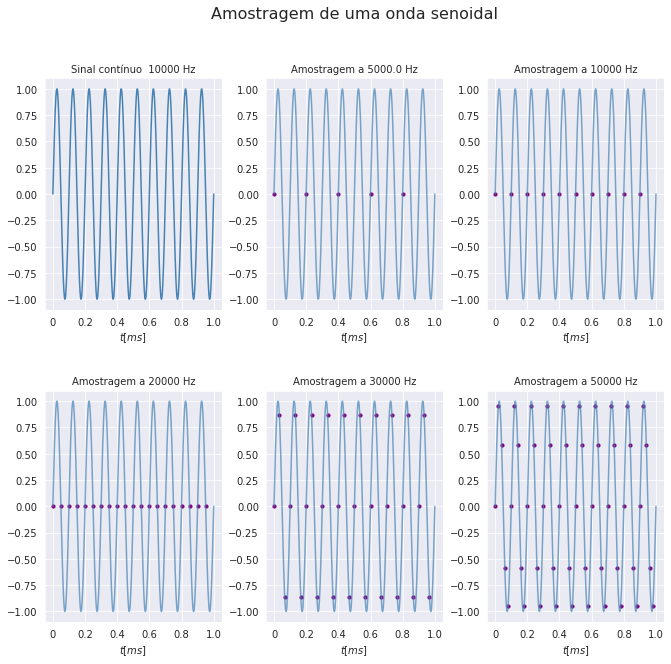

In [ ]:
f = 10000   # Frequencia do sinal senoidal de entrada [Hz]
fs = [f/2, f, 2*f, 3*f, 5*f] # Frequencia de amostragem [Hz]
Ttot = 10 *1/f # Período total de amostragem = 10* o período fundamental do sinal
# gerar sinal
t = np.arange(0,Ttot,1/(100*f)) # Tempo total de amostragem discretizado de acordo com a frequência de amostragem
sinal = np.sin(2*np.pi*f*t) # geração onda senoidal

rowCnt = 2     # linhas
colCnt = 3     # colunas
subCnt = 2     # numero do gráfico

'''
Plotagem simulando sinal contínuo:
discretizando com fs = 100 f, isto é, 100x a frequência do sinal
'''
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(rowCnt, colCnt, 1)
plt.plot(t,sinal, c='steelblue')
plt.title('Sinal contínuo  {} Hz'.format(f), fontsize=10)
plt.xlabel(r'$t[ms]$', fontsize=10)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:2.1f}'.format(val*1000) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=1/5000))  

'''
Os cinco outros gráficos plotam o sinal "contínuo"
e diferentes taxas de amostragem, de acordo com a array fs
definida anteriormente. A amostragem é representada por pontos e
o sinal por linha contínua
'''
for i,j in zip(fs,range(len(fs))):
  Ts = 1/i
  t_s = np.arange(0,10/f,Ts)
  sinal_s = np.sin(2*np.pi*f*t_s)
  ax = plt.subplot(rowCnt, colCnt, subCnt,label=str(i)+' Hz')
  plt.title('Amostragem a {} Hz'.format(i), fontsize=10)
  plt.xlabel(r'$t[ms]$', fontsize=10)
  ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:2.1f}'.format(val*1000) if val !=0 else '0'
))
  ax.xaxis.set_major_locator(MultipleLocator(base=1/5000))  
  plt.plot(t,sinal,alpha = 0.7, c='steelblue')
  plt.scatter(t_s, sinal_s, s=10, c='purple')
  subCnt = subCnt + 1
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
plt.suptitle('Amostragem de uma onda senoidal',size=16)
plt.show()


Estamos comparando o sinal real (que, obviamente, é só uma 'ilusão' nossa. Quando trabalhamos com amostragem não conhecemos o sinal, nem sua frequência fundamental - estamos amostrando justamente para conhecê-lo.

Por isso, a frequência importante na amostragem é a frequência digital,
$$
\Omega=\omega T_s = {2\pi\omega \over \omega_s}
$$

Faça uma analogia da equação da acima e os pontos amostrados do sinal, definidos pela linha de comando:
```
sinal_s = np.sin(2*np.pi*f*t_s)
```
lembrando que a cada instante `n`, `t_s=n*1/fs`.






### Exercício 02 - FFT de um sinal senoidal

FFT (FAST FOURIER TRANSFORM) é simplesmente uma forma mais rápida de calcular a DFT. 

A FFT utiliza alguns algoritmos que permitem reduzir o número de operações para $N\log_2{N}$. A FFT é executada mais rapidamente com um vetor cujo comprimento é uma potência de $2$.

Para $N=1000$, $DFT=1 000 000$ operações, $FFT=10 000$ operações.

#### A FFT em Python
Python permite o cálculo fácil da DFT via FFT. Se tivermos um vetor A, de n elementos, 

Agora vamos utilizar a FFT. 

No primeiro exemplo, aprenderemos a analisar a resposta da FFT. 

No segundo, apenas iremos ilustrar o papel da função `fftshift`. 

Por último, utilizaremos algumas propriedades bastante conhecidas e importantes da transformada. São elas:

* **Translação no domínio do tempo:** Transladar um sinal no domínio do tempo faz com que a transformada de Fourier seja multiplicada por uma exponencial complexa,
$$x(t-t_0 ) \xrightarrow[]{FT} e^{-j\omega t_0} X(\omega)$$
* **Convolução:** A transformada de Fourier da convolução de dois sinais é o produto das transformadas desses sinais,
$$y(t)=h(t)*x(t) \xrightarrow[]{FT} Y(\omega)=H(\omega)X(\omega)$$

* **Linearidade:** A propriedade de linearidade ou de superposição de efeitos estabelece que combinações lineares no domínio do tempo correspondem a combinações lineares no domínio da frequência.
$$ax(t)+by(t) \xrightarrow[]{FT} aX(\omega)+bY(\omega)
$$



#### Parte I

Como primeiro exemplo, considera-se a função cosseno,
$$
x(t)=3\cos{\left(2\pi f_1t+0.2\right)}+\cos{\left(2\pi f_2t-0.3\right)}+2\cos{\left(2\pi f_3t+2.4\right)}
$$
onde $f_1=20$ $Hz$, $f_2=30$ $Hz$ e $f_3=40$ $Hz$. Considere a frequência de amostragem $f_s=1000$ $amostras/segundo$, amostrando-se em um período total de $1.5$ $ms$.

Com esse exemplo, vamos entender a FFT...

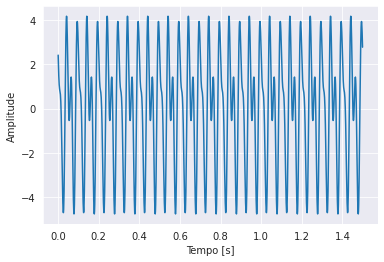

In [ ]:
# Taxa de amostagem 
N = 1500
fs = 1000
Ts = 1/fs
T = N*Ts
# Frequencias, em Hz, do sinal
f1 = 20
DigFreq1 = 2*np.pi*f1/fs
f2 = 30
DigFreq2 = 2*np.pi*f2/fs
f3 = 40
DigFreq3 = 2*np.pi*f3/fs
# Plot
n = np.arange(0,N)
t_s = np.linspace(0,T,N,endpoint=False)

x=3.*np.cos(DigFreq1*n+0.2)+np.cos(DigFreq2*n-0.3)+2.*np.cos(DigFreq3*n+2.4)

plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.plot(t_s, x)
plt.show()

In [ ]:
X = np.fft.fft(x)

O comprimento das variáveis $x$ (dominio do tempo) e $X$ (dominio da frequência) são iguais. 

Porém,	algumas características improtantes devem ser verificadas:
* os valores de $x $ são valores reais, enquanto os valores de $X$ são complexos;
* se compararmos o primeiro valor da sequência do vetor $X$ resultante da DFT  (índice 0) com o último valor da sequência (índice 1499), podemos ver que as partes reais de ambos os números são iguais e que o valor dos números imaginários também são iguais em magnitude, apenas um é positivo e o outro é negativo. Os números são conjugados complexos uns dos outros. Isso é verdadeiro para todos os números na sequência: $n$ é o conjugado complexo de $N-1-n$;
* como a segunda metade da sequência não nos fornece nenhuma informação nova, já podemos concluir que a metade da sequência FFT é a saída de que precisamos.

In [ ]:
print('Comprimento de x: {:4d} e de X: {:4d}'.format(len(x),len(X)))

index = [2,13,450,500,600]
for i in index:
    print("Valor no índice {}:\t{}".format(i, X[i + 1]), "\nValue no índice {}:\t{}".format(X.size -1 - i, X[-1 - i]))


Comprimento de x: 1500 e de X: 1500
Valor no índice 2:	(-2.4658053376924727e-13-7.886469255424799e-13j) 
Value no índice 1497:	(-2.654647096923725e-13+8.008880480408207e-13j)
Valor no índice 13:	(-9.008016251962456e-14-2.1987480757556117e-14j) 
Value no índice 1486:	(-8.382601982843125e-14+3.3058814014394666e-14j)
Valor no índice 450:	(-3.5381453943904987e-13-7.664301409683933e-13j) 
Value no índice 1049:	(-3.546174349002717e-13+7.661541129684375e-13j)
Valor no índice 500:	(3.082799549710292e-13+6.90476879676326e-15j) 
Value no índice 999:	(2.980918464279345e-13+1.8304047871348586e-15j)
Valor no índice 600:	(-3.651976877881392e-13-4.0379538208039315e-15j) 
Value no índice 899:	(-3.68302824454094e-13+2.3457419391704502e-15j)


Os números complexos da FFT contêm as seguintes informações:
* Amplitude de uma certa frequência de onda senoidal de (energia).
* Deslocamento de fase de uma certa  frequência de onda senoidal.

Como já aprendemos, amplitude é recuperada tomando o valor absoluto do número e o deslocamento de fase é obtido calculando o ângulo do número,


```
A = np.abs(x)
phi = np.angle(X)
```




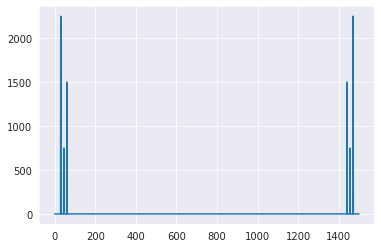

In [ ]:
X_mag=np.abs(X)
plt.plot(X_mag)

 ![](https://drive.google.com/uc?export=view&id=1ATYeT0NtMdu3YZkK2F41JGiL3jAH8Vf1)

Porque os valores espelhados? Lembra-se da replicação do sinal  no domínio da frequência, por causa da amostragem? 

 ![](https://drive.google.com/uc?export=view&id=182m3OLtL8grk7tRWkbES3esWDcnYiaJM)

Pois é, sabe-se que a transformada de Fourier de um sinal discreto é um sinal periódico no domínio da frequência. O Python, obviamente, sempre trabalha em domínio discreto, de modo que, usando a função `np.fft.fft`, você sempre obtém sinais periódicos na frequência. 

Mas, a função FFT do Python considera apenas um período desse sinal. Isto é, todo espectro do domínio da frequência varia de -$f_s$ a $+f_s$ $Hz$. Para as convenções adotadas, como a primeira amostra vetorial $x(t)$ corresponde à amostra no tempo $t = 0$, então a primeira amostra de sinal $X(\omega)$ corresponde à amostra em $\omega = 0$. Porém, o Python não permite que uma array tenha índices negativos. Além disso, faz sentido analisar somente metade do sinal (lembre-se da frequência de Nyquist!!!).  Por esta razão, após uma fft, o sinal obtido é aquele da Figura abaixo, onde as amostras de frequência negativa são rebatidas ao fundo, na segunda metade do vetor. Para ver o espectro de frequências matematicamente compatível com a entrada, deve-se utilizar a ifft, que será vista mais para frente.

 ![](https://drive.google.com/uc?export=view&id=1tB3vJu-UqnTFYr3bv4QPH59G_sV26CvT)

O eixo das abscissas corresponde a frequências, mas seu valor exato, como vimos, depende do comprimento do sinal. Inicialmente, considera-se as chamadas *bin frequencies* ($f_{bins}$) ié, os valores de $0$ a $1499=N-1$, que é o tamanho do sinal que foi criado. Quando discretizamos a TRansformada de Fourier,
$$
e^{-j\omega} \rightarrow e^{-j{2\pi k}/{N}}
$$
nosso contínuo $\omega$ se tornou $N$ *bins* discretas. Essa frequência em bins corresponde a uma certa frequência em $Hz$. 

* **Escala X, frequência em Hz:** A escala de frequência começa em $0$ e se estende até $𝑁−1$ para uma FFT de $𝑁$ pontos. Portanto, o espaçamento de frequência na FFT é,
$$
\Delta f = \frac{f_s}{N}
$$
onde$f_𝑠$ é a frequência de amostragem. Ou seja,
$$
f = f_{bins}\frac{f_s}{N}
$$

* **Escala Y, Magnitude:** O espaçamento de frequência entre elementos da FFT depende do comprimento da FFT e da frequência de amostragem. Se as frequências não caem especificamente sobre um ponto discreto da FFT (conforme a definição de $\Delta f$), a energia em uma componente em particular vai ser mapeada para uma frequência ligeiramente diferente.

No eixo das ordenadas, a magnitude está multiplicada também por $N/2$.


Juntando toda explicação anterior, podemos traçar o espectro de frequência para nossa função de onda senoidal simples. Plotamos apenas metade do espectro, porque essa é a única metade que nos fornece informações reais.

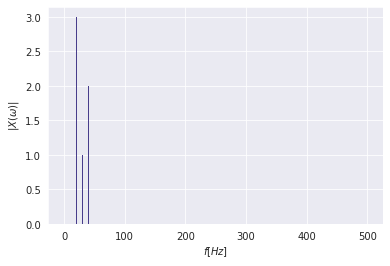

In [ ]:
X = np.fft.fft(x)
#Posso escrever f de duas maneiras (escolha a sua):
f = np.linspace(0, 1/Ts, N) # ou f = bins*fs/N

fig, ax = plt.subplots()  
plt.ylabel(r'$|X(\omega)|$')
plt.xlabel(r'$f[Hz]$')
ax.bar(f[:N//2], np.abs(X)[:N//2]*1/(N/2), width=2, color='darkslateblue', edgecolor='none')  
plt.show()

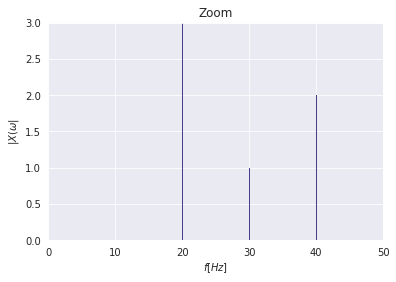

In [ ]:
#Zoom
plt.ylabel(r'$|X(\omega|$')
plt.xlabel(r'$f[Hz]$')
plt.bar(f[:N//2], np.abs(X)[:N//2]*1/(N/2), width=0.1, color='darkslateblue', edgecolor='none')  
plt.axis([0,50,0,3])
plt.title('Zoom')        
plt.show() 

Como podemos ver FFT funciona! Ela nos deu informações sobre as frequências das ondas que compõem o sinal.

A FFT é uma compensação entre informações de tempo e informações de frequência. Ao tomar a FFT de um sinal de tempo, todas as informações de tempo são perdidas em troca de informações de frequência. Para manter as informações sobre o tempo e as frequências em um espectro, devemos fazer um *espectrograma*, lembram-se?


Conforme discutido no último capítulo, preencher o sinal do domínio do tempo com zeros torna o período do domínio do tempo mais longo, bem como torna o espaçamento entre as amostras no domínio da frequência mais estreito. Conforme N se aproxima do infinito, o domínio do tempo se torna aperiódico e o domínio da frequência torna-se um sinal contínuo. Esta é a DTFT, a transformada de Fourier que relaciona um sinal discreto aperiódico com um espectro de frequência periódico e contínuo.


 


A fase do sinal também é uma informação importante, que pode ser tirada de $X(\omega)$. Se você verificar a fase em cada componente, verá que coincide com a fase do sinal...

De onde saíram os números 30, 45 e 60 que são usados abaixo???



In [ ]:
X_fase = np.angle(X)
print('As defasagens das senoides de frequencia 20, 30 e 40 rad/s são, respectivamente: {:3.2f}, {:3.2f} e {:3.2f}'.format(X_fase[30],X_fase[45],X_fase[60]))

As defasagens das senoides de frequencia 20, 30 e 40 rad/s são, respectivamente: 0.20, -0.30 e 2.40


#### Parte II

A figura abaixo foi extraída do [link](http://pysdr.org/content/frequency_domain.html) e ilustra o formato da saída da FFT, por motivos matemáticos, como citamos anteriormente

Porém, para visualizar da maneira que estamosa costumados: $0$ Hz (DC) no centro, frequências negativas à esquerda e  positivas à direita, mudança na FFT, que é apenas uma operação simples de rearranjo de array, como uma espécie de mudança circular, mas mais como *colocar isso aqui e aquilo ali*. Esse é o papel do comando `fftshift`.

 ![](https://drive.google.com/uc?export=view&id=1XXsY8yY11oVRMQOphjjD9Jw4T4_FG0gM)

Para ilustrar o comando `fftshift`, acompanhe o código abaixo. Iremos fazer a FFT de um pulso retangular e depois aplicar a `fftshift`.


Se você lembrar da teoria, a DTFT de uma função pulso retangular, discreta, 
$$
x(t)=\left\{ \begin{align} 1 &\qquad n= 0,\cdots,M-1 \\
0 & \qquad cc
\end{align} \right.
$$
é dada pela equação de Dirichlet com uma multiplicação exponencial, consequência da translação no tempo,
$$
X(\Omega)=\frac{\sin \left[\Omega M/2\right]}{\sin \left[\Omega/2\right]} e^{-j\Omega(M-1)/2} = M \text{diric}\left(\Omega,N\right)e^{-j\Omega(M-1)/2}
$$
onde $M$ é o número total de pontos amostrais diferentes de zero.

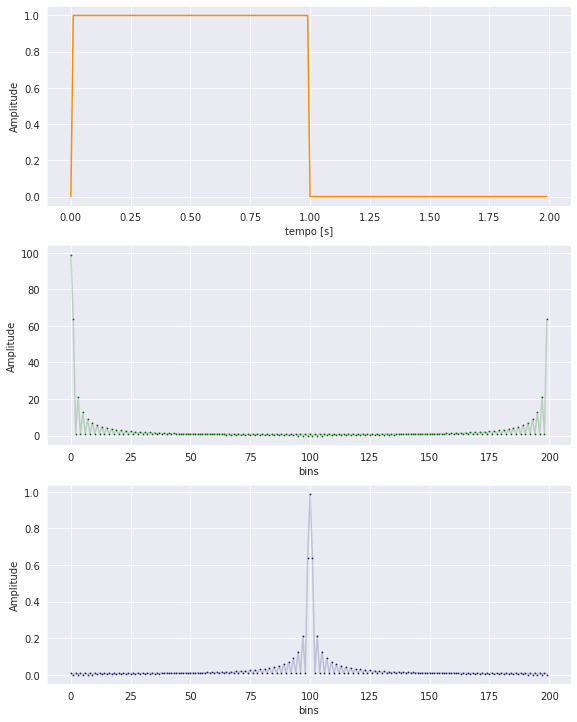

In [ ]:
Tp=1             # Intervalo do pulso
T = 2.           # Intervalo do sinal  
fs=100           # Frequência de amostragem [Hz]
Ts = 1/fs        # Período de amostragem [s]
N = int(T/Ts)    # Número de pontos
M = int(Tp/Ts)   # número de pontos diferentes de zero  
t_s = np.linspace(0,T,N,endpoint=False)   # Amostragem no tempo
bins = np.arange(0,N)

def rect(t,Tp):
    x = (abs(t) < Tp)
    y = (abs(t) > 0)
    a = np.array(x*y)
    return 1 * a
# Pulso retangular

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(8,10))
plt.tight_layout()

plt.subplot(311)
wRect1 = rect(t_s,Tp)
plt.plot(t_s,wRect1, c = 'darkorange')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')

plt.subplot(312)
X=np.fft.fft(wRect1);
plt.plot(bins,np.abs(X), c = 'darkgreen', alpha = 0.2)
plt.scatter(bins,np.abs(X), c = 'darkgreen', s=0.5)
plt.ylabel('Amplitude')
plt.xlabel('bins')

plt.subplot(313)
Y=np.fft.fftshift(X)
plt.plot(bins,abs(Y)/(N/2), c = 'midnightblue', alpha = 0.2)
plt.scatter(bins,abs(Y)/(N/2), c = 'midnightblue', s=0.5)
plt.ylabel('Amplitude')
plt.xlabel('bins')
fig.subplots_adjust(hspace=.2)
plt.show()

Portanto, a função `np.fft.shiftfft` permite que você reordene as frequências e  represente o sinal transformado centralizado no vetor de frequência, como esperado matematicamente.


Abaixo, comparamos o resultado da FFT com a DTFT.

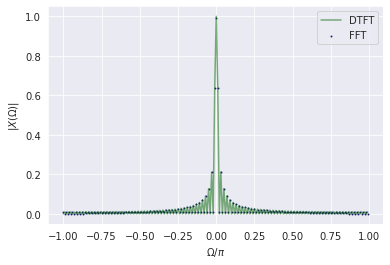

In [ ]:
w = np.linspace(-np.pi, np.pi, len(bins),endpoint=False)

X_dtft = (np.sin(w*M/2)/np.sin(w/2))*np.exp(-1j*w*(M-1)/2)
plt.plot(w/(np.pi), np.abs(X_dtft)/M,c = 'darkgreen', alpha = 0.5,label = 'DTFT')
plt.scatter(w/(np.pi),abs(Y)/(N/2), c = 'midnightblue', s=0.8, label = 'FFT')
plt.xlabel(r'$\Omega/\pi$')
plt.ylabel(r'$|X(\Omega)|$')
plt.legend()
plt.show()

#### Parte III

O sinal ilustrado no gráfico plotado pelo código abaixo é composto por duas senóides: entre $0$ e $5$ segundos há um seno de $2$ $Hz$ e entre $5$ e $10$ segundos um seno de $5$ Hz.








Text(0.5, 0, 'tempo [s]')

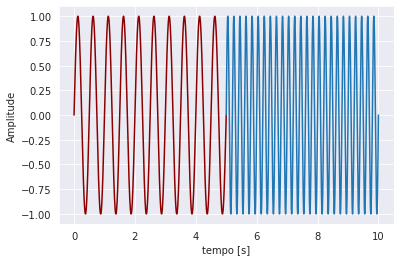

In [ ]:
Amplit = 1.
t_s1 = np.linspace(0,5,10000)
t_s2 = np.linspace(5,10,10000)
f1=2                                      # Frequência do sinal senoidal 1
f2=5                                      # Frequência do sinal senoidal 2
seno1=Amplit*np.sin(2*np.pi*f1*t_s1)         # Geração da onda senoidal 
seno2=Amplit*np.sin(2*np.pi*f2*t_s2)         # Geração da onda senoidal 
 

plt.plot(t_s1,seno1, color ='darkred' )
plt.plot(t_s2,seno2)
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')



Obtenha o mesmo sinal utilizando:
* uma janela retangular (pulso de 5s);
* a propriedade de deslocamento no tempo, no domínio da frequência;
* a propriedade de linearidade, no domínio do tempo.

Suponha frequência de aquisição de $400$ $Hz$ durante $10$ segundos. 


* Crie os sinais senoidais e um pulso retangular, conforme o código abaixo:
```
Tp = 5
t_s = np.linspace(0,Tmax,N,endpoint=False)
bins = np.arange(0,N)                     
f1=2
f2=5                                      
seno1=Amplit*np.sin(2*np.pi*f1*t_s)      
seno2=Amplit*np.sin(2*np.pi*f2*t_s)      
wRect1 = rect(t_s,Tp)
```

* Utilizando-se a propriedade de deslocamento no tempo de um pulso retangular, desloca-se o pulso `wRect1` de 5s. Com a transformada inversa da FFT (ifft), cria-se um segundo pulso deslocado no tempo;

* Cria-se a sequência de sinais utilizando a propriedade da linearidade;

```
sinal = seno1*wRect1 + seno2*wRect2
```


Text(0.5, 0, 'tempo [s]')

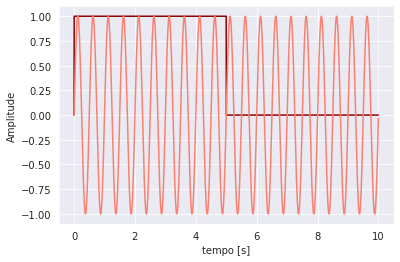

In [ ]:
T=10
Amplit=1
fs=400                                      # Frequência de amostragem [Hz]
Ts = 1/fs                                   # Período de amostragem [s]
N = int(T/Ts)                               # Número de pontos

t_s = np.linspace(0,T,N,endpoint=False)     # Amostragem no tempo
bins = np.arange(0,N)                       # bins
f1=2                                        # Frequência do sinal senoidal 1
f2=5                                        # Frequência do sinal senoidal 2
seno1=Amplit*np.sin(2*np.pi*f1*t_s)         # Geração da onda senoidal 
seno2=Amplit*np.sin(2*np.pi*f2*t_s)         # Geração da onda senoidal 
wRect1 = rect(t_s,T/2)

plt.plot(t_s,wRect1, color ='darkred' )
plt.plot(t_s,seno1,c='salmon')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')

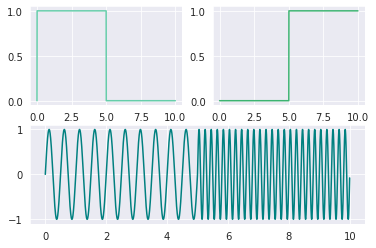

In [ ]:
F=np.fft.fft(wRect1)
Fshifted=np.fft.fftshift(F)

L=len(t_s)
f = np.linspace(0,1,L,endpoint=False)*fs/2

theta=(2j*np.pi*f*T)
time_shifted=Fshifted*np.exp(theta)
 
wRect2=np.fft.ifft(np.fft.ifftshift(time_shifted))

sinal=seno1*wRect1+seno2*wRect2

fig = plt.figure()
gs = gridspec.GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

ax1.plot(t_s,wRect1, c= 'mediumaquamarine')
ax2.plot(t_s,wRect2, c = 'mediumseagreen')
ax3.plot(t_s,sinal, c = 'teal')

plt.show()

Por último, vamos testar a convolução...

Faça a multiplicação de uma onda senoidal e um pulso retangular no tempo e faça a FFT. Compare com a FFT obtida da convolução das respostas da FFT da função seno com a FFT do pulso retangular. 

Vamos supor  uma onda de $10$ Hz...

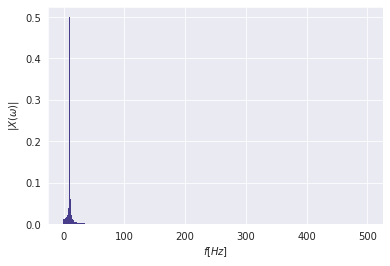

In [ ]:
T=5
Amplit=1
fs=1000                                      # Frequência de amostragem [Hz]
Ts = 1/fs                                   # Período de amostragem [s]
N = int(T/Ts)                               # Número de pontos

t_s = np.linspace(0,T,N,endpoint=False)     # Amostragem no tempo
bins = np.arange(0,N)                       # bins
f=10                                        # Frequência do sinal
seno=Amplit*np.sin(2*np.pi*f*t_s)         # Geração da onda senoidal 
wRect = rect(t_s,T/2)



#Parte 1 
#multiplicação de seno1 e wRect1 e FFT

t_s = np.linspace(0,T,N,endpoint=False)
x=seno*wRect
X = np.fft.fft(x)

f = np.linspace(0, 1/Ts, N)
fig, ax = plt.subplots()  
plt.ylabel(r'$|X(\omega)|$')
plt.xlabel(r'$f[Hz]$')
ax.bar(f[:N//2], np.abs(X)[:N//2]/(N/2), width=1, color='darkslateblue', edgecolor='none')  
plt.show()

O pico acima está aproximadamente em *20* Hz, mas sua amplitude é menor que $1$, pois existem componentes *espalhadas* ao redor do $20$ *roubando energia*. Você saberia explicar porquê? Pense um pouco sobre o gráfico abaixo (apenas plotando no tempo o sinal que você fez a fft) antes de ler a resposta.

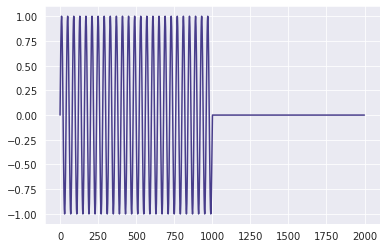

In [ ]:
plt.plot(r_[0:len(x)],x, color='darkslateblue')
plt.show()

Isso mesmo! Você fez a FFT de uma combinação entre uma senoide com um pulso retangular, que resultou em um conjunto de zeros no final do seu sinal. Se você não se convenceu que esses zeros que são responsáveis pela distorção, então tire os zeros e faça FFT de novo...

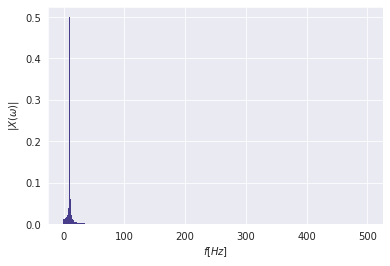

In [ ]:
#Parte 2
#convolução da FFT da função seno com a FFT do pulso retangular

FFT1 = np.fft.fftshift(np.fft.fft(seno))
FFT2 = np.fft.fftshift(np.fft.fft(wRect))

## Convolução na frequência
Z = signal.convolve(FFT1,FFT2)

Zshifted = np.fft.fftshift(Z)[:N//2]

f = np.linspace(0, 1/Ts, N)[:N//2]
fig, ax = plt.subplots()  
plt.ylabel(r'$|X(\omega)|$')
plt.xlabel(r'$f[Hz]$')
ax.bar(f, (np.abs(Zshifted)/(N/2))/(fs*T), width=1, color='darkslateblue', edgecolor='none')  
plt.show()



Se você é um bom observador, e está estudando o Notebook da maneira correta, percebeu que ao aplicar FFT e depois FFTshift, se eu dividir pelo comprimento do vetor do sinal original, a magnitude está errada por um fator enorme. Só é correto se eu dividir pela frequência de amostragem $f_s$ e período $T$.



### Exercício 03 - Notas musicais

Os arquivos *sine1.wav*, *sine2.wav*, ..., *sine7.wav* na pasta *NotasMusicais* deveriam estar numeradas em ordem crescente de frequência, que coincide com as notas musicais Dó(261.63 Hz), Ré(293.66 Hz), Mi(329.63 Hz), Fá(349.23 Hz), Sol (392 Hz), Lá (440 Hz ), Si (493.88 Hz). Alguém não fez o trabalho de forma adequada. Sua tarefa consiste em criar um programa que reconheça a sequência de notas, de forma a completar a tabela:


Nota musical | Nome do arquivo
--- | ---
Dó |   
Ré |   
Mi |   
Fá |   
Sol |   
Lá |
Si |   



In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

Saving sine1.wav to sine1.wav
Saving sine2.wav to sine2.wav
Saving sine3.wav to sine3.wav
Saving sine4.wav to sine4.wav
Saving sine5.wav to sine5.wav
Saving sine6.wav to sine6.wav
Saving sine7.wav to sine7.wav


In [ ]:
sample_rate, samples = wavfile.read('sine1.wav')
Audio(data=samples, rate=sample_rate)

Duplo-clique __aqui__ para a solução.

<!-- Resposta abaixo:
def identificaNota( tituloNota):
# Amostragem sinal seno1
  sample_rate, samples = wavfile.read(np.str(tituloNota+'.wav'))
  Audio(data=samples, rate=sample_rate)
  X = np.fft.fft(samples)
  X_mag = np.abs(X)
  Y = np.fft.fftshift(X)
  Y_mag = np.abs(Y)
  N= len(Y) #tamanho do vetor
  bin = np.arange(0,N) 
 #titulo do sinal e mostrar dados obtidos
  plt.plot((sample_rate/N)*bin,X_mag/(N/2))
  plt.axis([0,500,0,10000])
  slide = X_mag[0:int(N/2)]
  indice = np.argmax(slide)
#  Do(261.63 Hz), Ré(293.66 Hz), Mi(329.63 Hz), Fá(349.23 Hz), Sol (392 Hz), Lá (440 Hz ), Si (493.88 Hz). 
  if indice < 280:
    name = 'Do'
  else:
    if indice < 310:
      name = 'Re'
    else:
      if indice < 335:
        name = 'Mi'
      else:
        if indice < 360:
          name = 'Fa'
        else:
          if indice < 410:
            name = 'Sol'
          else:
            if indice < 460:
              name = 'La'
            else:
              name = 'Si'  
  print('A nota é {:2}, com frequencia de {:d} Hz.'.format(name,indice))
  return indice
i = identificaNota('sine1')
-->

### Exercício 4 - Amostragem

Faremos a amostragem de diferentes sinais que nos permitirão analisar a importância de três situações, frequentemente discutidas en análise de sinais: truque do zero padding, *leakage* e número de períodos de amostragem.

#### Parte I

Vamos analisar uma novamente a onda quadrada,


**Truque do Zero padding:** 

Depois de coletados os $N$ pontos de amostragem, colocamos alguns zeros adicionais ao final da lista para *enganar* o processo (como são zeros não alteram os valores da Transformada de Fourier Discreta). Supondo que tenhamos $N_t$ pontos, incluindo os zeros que adicionamos... O espaçamento entre os pontos da DFT será de $2\pi/N_t$, que é menor que $2\pi/N$.

Em Python, o comando é 

```
X = np.pad(x,(0,Nz),mode='constant')
```
onde `Nz` é o número de zeros a serem acrescentados ao final do sinal. 

Isto é, a resposta no domínio da frequência é sempre a mesma curva, porém, o truque do zero padding permite que se observe mais pontos dessa curva. 

Vamos verificar no exemplo abaixo.
Entendendo diferentes valores de $N_t$ na FFT: use os valores $N_t=64,256, 1024$ mantendo a frequência de amostragem. Avalie o resultado comparando as respostas. 

Para comparar as respostas, considere a resposta com $N_t=2048$ como contínua e faça quatro gráficos, comparando a resposta contínua com aquelas com diferentes valores de $N_t$. 

**Responda:** qual a influência de acrescentar zeros no final do sinal amostrado (truque do zero-padding)? 


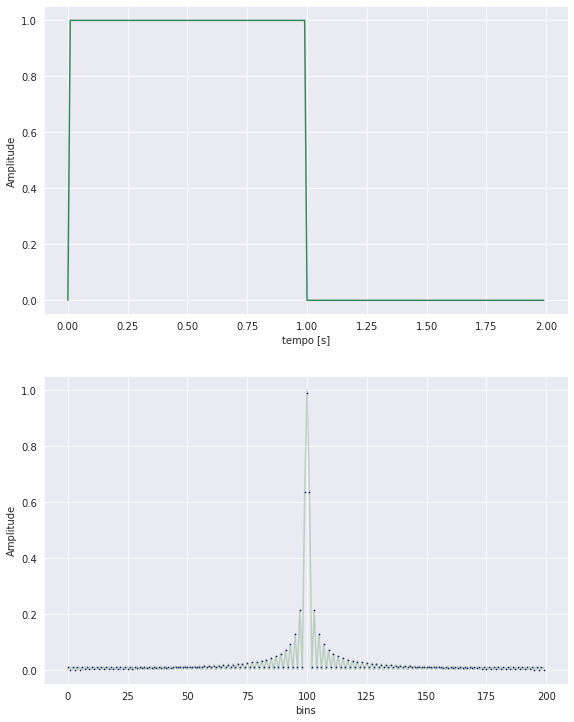

In [ ]:
Tp=1             # Intervalo do pulso
T = 2.           # Intervalo do sinal  
fs=100           # Frequência de amostragem [Hz]
Ts = 1/fs        # Período de amostragem [s]
N = int(T/Ts)    # Número de pontos
M = int(Tp/Ts)   # número de pontos diferentes de zero  
t_s = np.linspace(0,T,N,endpoint=False)   # Amostragem no tempo
bins = np.arange(0,N)

def rect(t,Tp):
    x = (abs(t) < Tp)
    y = (abs(t) > 0)
    a = np.array(x*y)
    return 1 * a
# Pulso retangular

w = np.linspace(-np.pi, np.pi, len(bins),endpoint=False)
X_dtft = (np.sin(w*M/2)/np.sin(w/2))*np.exp(-1j*w*(M-1)/2)
wRect = rect(t_s,Tp)

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8,10))
plt.tight_layout()

plt.subplot(211)
plt.plot(t_s,wRect, c = 'seagreen')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')

plt.subplot(212)
X=np.fft.fft(wRect);
Y=np.fft.fftshift(X)
plt.plot(bins,np.abs(X_dtft)/M, c = 'darkgreen', alpha = 0.2)
plt.scatter(bins,abs(Y)/(N/2), c = 'midnightblue', s=0.5)
plt.ylabel('Amplitude')
plt.xlabel('bins')

plt.ylabel('Amplitude')
plt.xlabel('bins')
fig.subplots_adjust(hspace=.2)
plt.show()

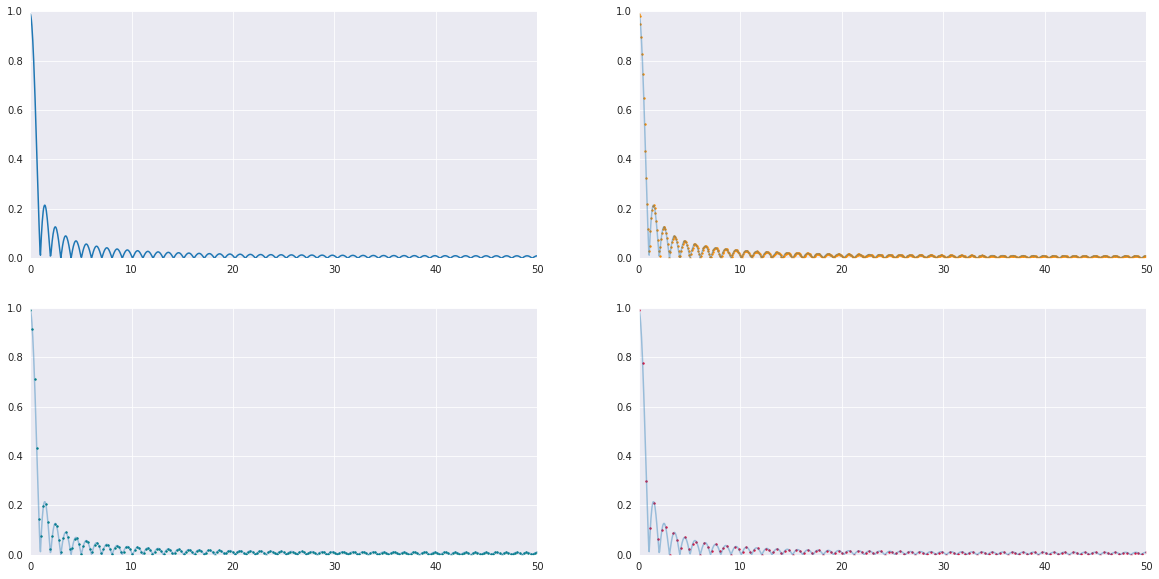

In [ ]:
x = rect(t_s,Tp)
N2 = N+64;
bins2 = np.arange(0,N2)

N3 = N+256;
bins3 = np.arange(0,N3)

N4 = N+1024;
bins4 = np.arange(0,N4)

N5=N+2048;
bins5 = np.arange(0,N5)
#
x2 = np.pad(x,(0,64),mode='constant')
X2 = np.abs(np.fft.fft(x2))/(len(x)/2)

x3 = np.pad(x,(0,256),mode='constant')
X3 = np.abs(np.fft.fft(x3))/(len(x)/2)

x4 = np.pad(x,(0,1024),mode='constant')
X4 = np.abs(np.fft.fft(x4))/(len(x)/2)

x5 = np.pad(x,(0,2048),mode='constant')
X5 = np.abs(np.fft.fft(x5))/(len(x)/2)

fig = plt.figure(figsize=(20,10))

plt.subplot(221)
plt.plot((fs/2)/(N5/2)*bins5,X5)
plt.axis([0,fs/2,0,1])

plt.subplot(222)
plt.plot((fs/2)/(N5/2)*bins5,X5, alpha = 0.4)
plt.scatter((fs/2)/(N4/2)*bins4,X4,s=2, color= 'darkorange')
plt.axis([0,fs/2,0,1])

plt.subplot(223)
plt.plot((fs/2)/(N5/2)*bins5,X5, alpha = 0.4)
plt.scatter((fs/2)/(N3/2)*bins3,X3,s=2, color= 'teal')
plt.axis([0,fs/2,0,1])

plt.subplot(224)
plt.plot((fs/2)/(N5/2)*bins5,X5, alpha = 0.4)
plt.scatter((fs/2)/(N2/2)*bins2,X2,s = 2, color= 'crimson')
plt.axis([0,fs/2,0,1])

plt.show()


Se sua conlcusão foi que o truque do *zero padding* aumenta a discretização do espectro do sinal, parabéns! Chamamos de *truque* porque Não aumenta a precisão - voltaremos a esse assunto mais adiante. Se o sinal está distorcido, o *zero padding* pegará apenas mais pontos do sinal distorcido.

#### Parte II
O sinal de frequência $1$ Hz,
$$
x = \cos⁡(2\pi t)
$$
será amostrado de forma diferente desta vez. Você verá que a nossa amostra não compreende períodos inteiros do sinal.

E isso é um problema? Sim...

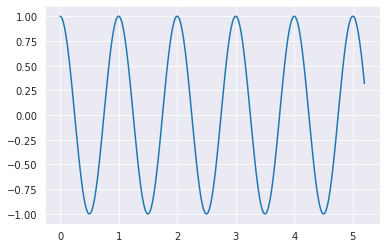

In [ ]:
Amplit = 1.
T=5.2
f=1.
fs=500
Ts = 1/fs
N=int(T/Ts)
DigFreq = 2*np.pi*f/fs

bins = np.arange(0,N)

t_s = np.linspace(0,T,N,endpoint=False)

x=Amplit*np.cos(DigFreq*bins)

plt.plot(t_s,x)
plt.show()


Matematicamente, a DFT, através da FFT, *vê* o sinal como periódico (conforme vimos na teoria). Dessa forma, se amostrarmos o sinal sem cobrir ciclos inteiros, a FFT verá como mostrado no gráfico abaixo. A função,


```
np.concatenate((x, np.tile(x,2)))
```
é uma maneira de gerar um array com a função `x ` repetida três vezes. 


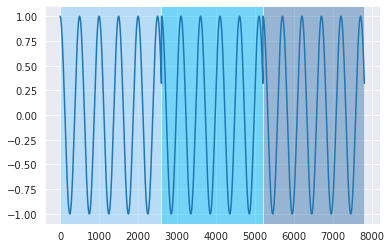

In [ ]:
sinal = np.concatenate((x, np.tile(x,2)))
fig, ax = plt.subplots()

ax.plot(r_[0:len(sinal)],np.concatenate((x, np.tile(x,2))))
ax.axvspan(0, int(T/Ts), facecolor='lightskyblue', alpha=0.5)
ax.axvspan(int(T/Ts)-1, 2*int(T/Ts), facecolor='deepskyblue', alpha=0.5)
ax.axvspan(2*int(T/Ts)-1, 3*int(T/Ts), facecolor='steelblue', alpha=0.5)
plt.show()

Quando você usa o FFT para medir o componente de frequência de um sinal, está baseando a análise em um conjunto finito de dados. A transformação FFT assume que a amostra é um período de um sinal periódico. Para o FFT, tanto o domínio do tempo quanto o domínio da frequência são topologias circulares, de modo que os dois pontos finais da forma de onda do tempo são interpretados como se estivessem conectados. Quando o sinal medido é periódico e um número inteiro de períodos preenche o intervalo de tempo de aquisição, a FFT funciona bem, pois corresponde a esta suposição.

No entanto, em geral, o sinal medido não é um número inteiro de períodos. Nesse caso, os pontos finais são descontínuos. Portanto, a finitude do sinal medido pode resultar em uma forma de onda truncada com características diferentes do sinal de tempo contínuo original, e a finitude pode introduzir descontinuidades no sinal medido. 

Essas descontinuidades artificiais aparecem na FFT como componentes de alta frequência não presentes no sinal original. Essas frequências podem ser muito mais altas do que a frequência de Nyquist e têm um alias entre $0$ e metade de sua taxa de amostragem. O espectro que você obtém usando um FFT, portanto, não é o espectro real do sinal original, mas uma versão *borrada*, ou *smeared*. Parece que a energia em uma frequência vaza para outras frequências. Este fenômeno é conhecido como vazamento espectral, ou *leakage* que faz com que as linhas espectrais se espalhem em sinais mais amplos.

A DFT de $x[n]$ é dada por,
$$
{\displaystyle X[k]\ {\stackrel {\text{def}}{=}}\ \sum _{n=0}^{N-1}x[n]\cdot e^{-j2\pi kn/N},\quad k\in \mathbb {Z} \,}
$$
que corresponde às frequências discretas $X(2\pi k/N)$ da DTFT, quando $n$ vale $\{0,2,\dots, N-1\}$. Em outras palavras, corresponde ao DTFT de $x[n]w[n]$ onde $w[n]$ é a janela retangular,
$$
w(t)=\left\{ \begin{align} 1 &\qquad n= 0,\cdots,N-1 \\
0 & \qquad cc
\end{align} \right.
$$

A multiplicação no domínio do tempo, gera convolução no domínio da frequência entre $X[\Omega]$ e $W[\Omega]$, para $\Omega=n/N$ é a frequência digital.

Sabe-se que a DFT da função pulso retangular é,

$$
W[\Omega]=\frac{\sin \left[\Omega M/2\right]}{\sin \left[\Omega/2\right]} e^{-j\Omega(N-1)/2} = N \text{diric}\left(\Omega,N\right)e^{-j\Omega(N-1)/2}
$$
que produz os lóbulos observados no *vazamento espectral*. 

![](https://drive.google.com/uc?export=view&id=12ItkzFUHA9QKiktDISkRVjSjANQ-bKoI)


A janela retangular fornece boa resolução frequencial, mas os lóbulos laterais são muito altos, resultando em muito ruído de fundo. Além disso, ocorre o fenômeno de leakage, discutido anteriormente, se os períodos de amostragem não forem completos.

\begin{align}
\mathcal{F}\{x \cdot w\} & \xrightarrow{\text{FT}} \mathcal{F}\{x\}*\mathcal{F}\{w\}\\
&={1\over 2\pi}\sum_{i=-\infty}^{+\infty} X[i]\color{red}{W[\Omega-i]}
\end{align}

Obviamente, a parte em vermelho causa a distorção do sinal - a versão *borrada*. Veja que, a medida que a janela tende a uma dimensão infinita, sua DFT tende a um delta e a distorção tende a diminuir.

![](https://drive.google.com/uc?export=view&id=1-kA639TtH-WC074Ok8VFpLYDIhCoIujn)



Entenda o fenômeno de leakage, definindo períodos não completos de amostragem do exemplo. 

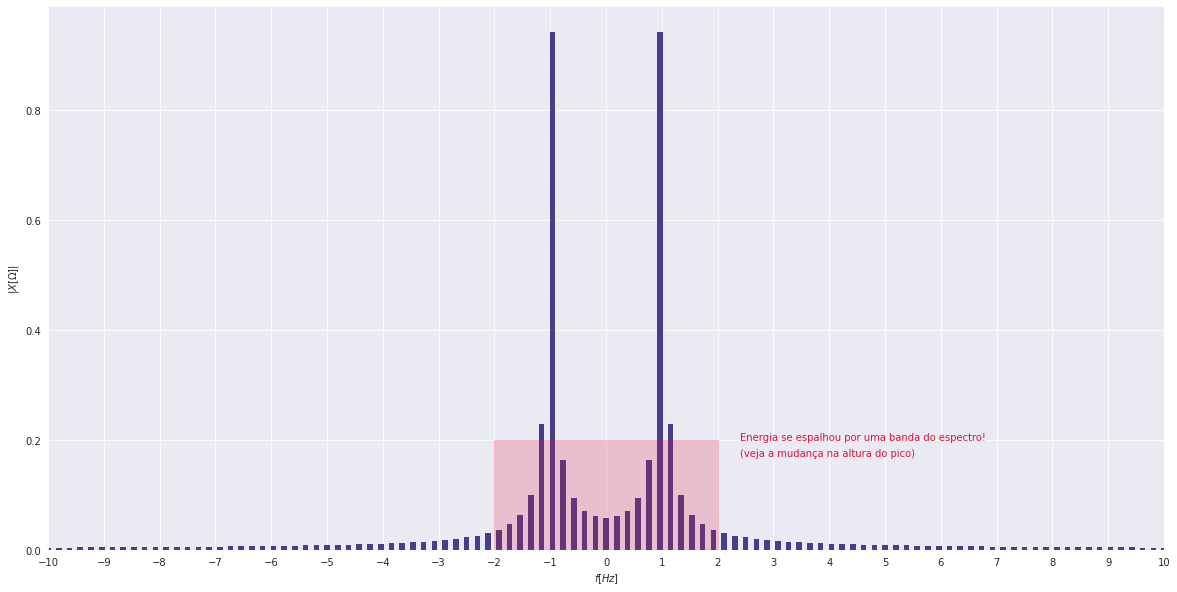

In [ ]:
Xshifted = np.fft.fftshift(np.fft.fft(x))
w = np.linspace(-np.pi, np.pi, len(bins),endpoint=False)
fig, ax = plt.subplots(figsize=(20,10))


ax.bar(w*fs/(2*np.pi),np.abs(Xshifted)/(N/2),width=.1, color='darkslateblue', edgecolor='none')  
loc = tck.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
width = 4
height = 0.2
ax.add_patch(patches.Rectangle((-2, 0), width, height,color='crimson', alpha = 0.2))
plt.text(2.4,0.2,'Energia se espalhou por uma banda do espectro!',color='crimson')
plt.text(2.4,0.17,'(veja a mudança na altura do pico)',color='crimson')

plt.xlim((-10,10))
plt.ylabel(r'$|X[\Omega]|$')
plt.xlabel(r'$f [Hz]$')
plt.show()

#### Parte III

**Número de períodos de amostragem:**

Mantendo o valor de $N_p=1024$ constante, plote a FFT para diferentes números de períodos amostrados. Você amostrou 5.2 períodos no item anterior. Compare essa resposta com a resposta obtida amostrando $2x,3x$ e $4x$ o período inicial.



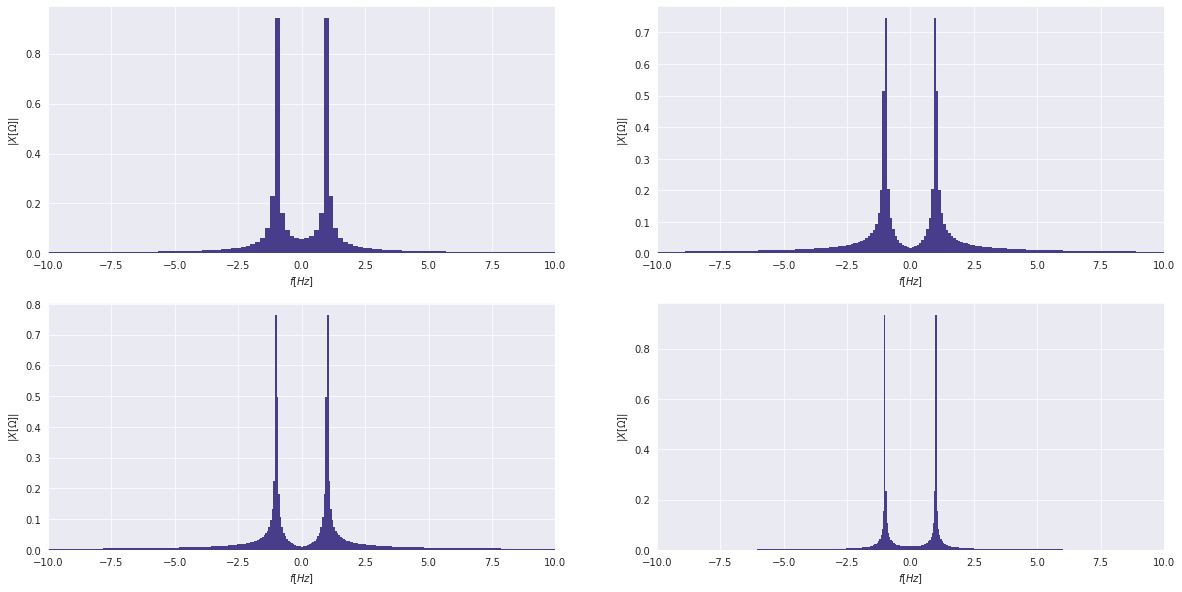

In [ ]:
T0 = 5.2
T=[T0, 2*T0, 3*T0, 4*T0]
N = 2048
bins = np.arange(0,N)
fig, ax = plt.subplots(figsize=(20,10))
for i,Ti in enumerate(T):
  Ts = Ti/N
  fs = 1/Ts
  t_s = np.linspace(0,T,N,endpoint=False)
  x = np.cos(2*np.pi*bins/fs)
  Xshifted = np.fft.fftshift(np.fft.fft(x))
  w = np.linspace(-np.pi, np.pi, len(bins),endpoint=False)
  deltaw=(w[1]-w[0])*fs/(2*np.pi)

  plt.subplot(2,2,i+1)
  plt.bar(w*fs/(2*np.pi),np.abs(Xshifted)/(N/2),width=deltaw, color='darkslateblue', edgecolor='none')  
  ax.add_patch(patches.Rectangle((-2, 0), width, height,color='crimson', alpha = 0.2))
  plt.xlim((-10,10))
  plt.ylabel(r'$|X[\Omega]|$')
  plt.xlabel(r'$f [Hz]$')
plt.show()


### Exercício 05 - Janelamento

Você pode minimizar os efeitos da execução de uma FFT em um número não inteiro de ciclos usando uma técnica chamada janelamento. O janelamento reduz a amplitude das descontinuidades nos limites de cada sequência finita adquirida pelo digitalizador. O janelamento consiste em multiplicar o os dados do domínio no tempo por uma janela de comprimento finito com uma amplitude que varia suave e gradualmente em direção a zero nas bordas. Isso faz com que os pontos finais da forma de onda se encontrem e, portanto, resulta em uma forma de onda contínua sem transições nítidas. Essa técnica também é conhecida como aplicação de janela.

A janela que indiretamente usamos até agora para tornar nosso sinal finito é a retangular, que é igual a $1$ durante o intervalo de tempo que se pretende analisar, e igual a zero fora desse intervalo. 

Existem várias janelas, além de retangular, objetivo é diminuir a influência dos extremos from amostragem. Veja, exemplo, para janela de Hanning (também chamada de Hann), em homenagem ao vienense Julius Ferdinand von Hann (1839-1921). Para a janela Hanning é um modelo de como:
$$
w[k]={1\over 2}\left[1-\cos\frac{2\pi k}{M-1}\right]\qquad k=0,\cdots,M-1
$$

Já o janelamento de Hamming começa em $0.08$, sobe para $1$ no meio do período, e depois cai novamente até $0.08$ no final,
$$
w (k) = 0.54-0.46\cos\left(\frac{2\pi k}{M-1}\right)\qquad k = 0, \cdots, M-1
$$
Ou seja, os valores iniciais e finais da amostragem são atenuados. 

Em python,a s janelas são definidas como,


```
np.hanning(M)
```
e


```
np.hamming(M)
```

Uma figura ilustrada ou comportamento de algumas configurações.

![](https://drive.google.com/uc?export=view&id=1qd64Nx3NkA_5mfw0K2bcOrFNF5YgLsUY)


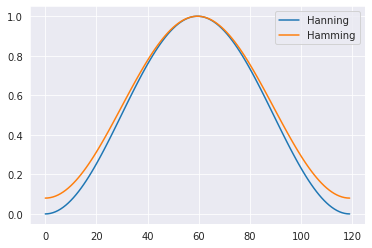

In [ ]:
plt.plot(np.hanning(120), label = 'Hanning')
plt.plot(np.hamming(120), label = 'Hamming')
plt.legend()
plt.show()

Analise o sinal sinusoidal composto de três frequências,
$$
x=\cos⁡(2\pi f_1 n T_s)+ \cos(2\pi f_2 n T_s) + \cos (2\pi f_3 n T_s)
$$
onde,
\begin{align} 
f_1 &= 2000 Hz\\
f_2 &= 2500 Hz\\
f_3 &= 3000 Hz
\end{align}
e
$$
f_s = 1000 Hz
$$
onde $f_s$ é a taxa de amostragem, e $T_s=1/f_s$  é o período de amostragem. 
Nesse exercício você deve definir uma $f_s$ constante e utilizar um número diferente de amostras: $N=10,20,10$ e $200$. 

Utilize sempre as janelas retangular e hamming, conforme parte do código abaixo. Veja que para janelamento Hamming a regra é que a magnitude é o valor dividido por $N/4$.

Analise a resposta das duas janelas a medida em que o período de amostragem (isto é, $N$) aumenta. Discuta os resultados.


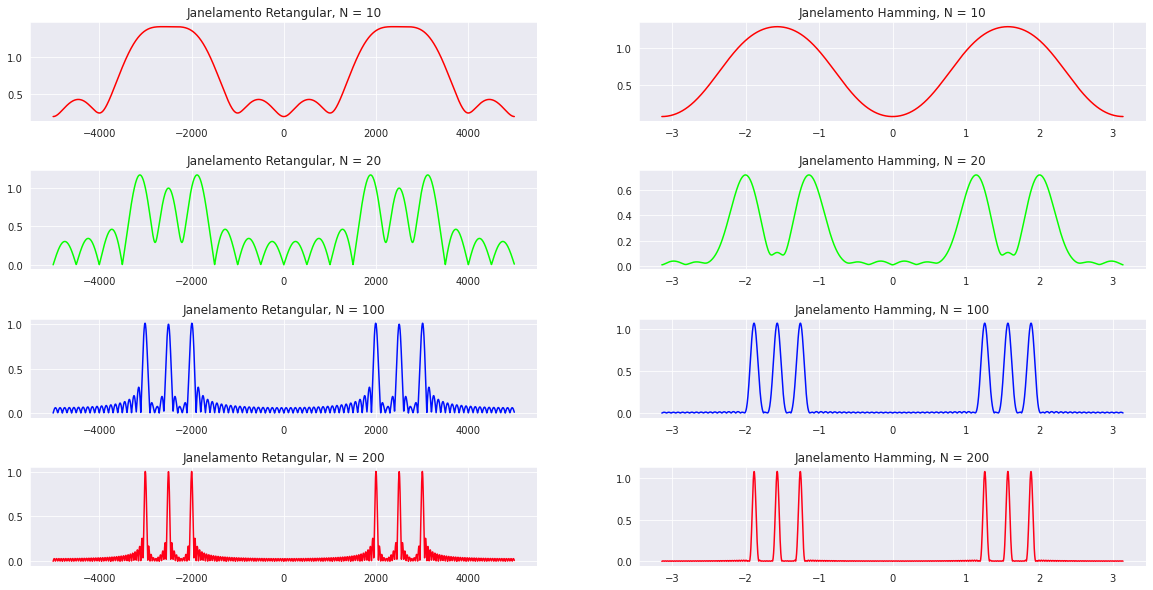

In [ ]:
fs=10000 # Frequencia de amostragem
Ts=1/fs  # Período de amostragem
#Frequencias do sinal
f1=2000
f2=2500
f3=3000
Ns = [10, 20, 100, 200]
cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 1, len(Ns))]
N2=2048
w = np.linspace(-np.pi, np.pi, N2,endpoint=False)

fig, ax = plt.subplots(figsize=(20,10))
j=1
for i,N in enumerate(Ns):
  bins = np.arange(0,N)
  fd = bins/fs
  T=N*Ts
  x=cos(2*pi*f1*fd)+cos(2*pi*f2*fd)+cos(2*pi*f3*fd)  # Calcular x(n)*w(n)
# retangular
  xr = np.pad(x,(0,N2-N),mode='constant')
  Xr = np.abs(np.fft.fft(xr))
  Xshifted = np.fft.fftshift(Xr)/(N/2)
  subplot(4, 2, j)
  plt.plot(w/(2*np.pi)*fs,np.abs(Xshifted),color=colors[i])
  plt.title('Janelamento Retangular, N = ' + str(N))
   
# hamming 
  h = np.hamming(N)
  xh = np.pad(x*h,(0,N2-N),mode='constant')
  Xh = np.abs(np.fft.fft(xh))
  Xshifted = np.fft.fftshift(Xh)/(N/4) 
  subplot(4, 2, j+1)
  plt.plot(w,np.abs(Xshifted), color=colors[i])
  plt.title('Janelamento Hamming, N = ' + str(N))
  j=j+2
  fig.subplots_adjust(hspace=.5)
plt.show()



### Exercício 06 - Filtros

Para detalhar outro assunto importante, vamos testar alguns filtros.
Inicialmente, vamos fazer um exemplo filtro de média móvel (*moving average filter*). É feita uma média de um número M de pontos do sinal da entrada $x[i]$, para produzir cada ponto do sinal de saída $y[i]$:
$$
y[i]={1\over M}\sum\limits_{j=1}^M x[i+j]
$$

Grave sua voz por 5s e passe um filtro de média móvel para diferentes valores de $M$ e reproduza a resposta.


A figura abaixo ilustra a diferença entre a Transformada de Fourier de um sinal discreto e de um sinal contínuo. Isto é, quando o sinal é amostrado, seu espectro é replicado de acordo com a frequência de amostragem $f_s$.

![](https://drive.google.com/uc?export=view&id=1z4rS4pLrD6A7wpnQmbghFP5yftZXuDOD)

Por isso, o diz o teorema de Nyquist que:

Se um sinal analógico $x(t)$ tem banda limitada, ou seja, se a frequência mais elevada do sinal é $B$ ou seja, 
$$
X(\omega)=0 {\text{ para }} |f|>B, 
$$
então, é suficiente uma amostragem a qualquer taxa 
$$
f_s > 2B
$$

Porém, na maioria das vezes, não sabemos a priori, quais as frequências de nosso sinal. Além disso, muitos sinais não tem largura de banda finita ou não conhecemos. Dessa forma, existe uma grande chance de ocorrer sobreposição nas réplicas da frequência... o que impossibilitaria de reconstruir o sinal corretamente.

![](https://drive.google.com/uc?export=view&id=10qqdZ6oMANlFETM3yTqlw_17_hJqg9xu)


Portanto, ao amostrar um sinal que contém frequências acima da metade da frequência de amostragem, a amostragem mapeia essas frequências para outras frequências dentro da frequência de Nyquist. Essas chamadas frequências *de imagem* ou frequências *alias* são frequentemente indesejadas, uma vez que não representam o sinal original. Em vez disso, usa-se um filtro anti-aliasing (AAF) para filtrar o sinal de entrada **antes** da amostragem.



O filtro anti-aliasing é basicamente um filtro passa-baixa com frequência de corte (ideal) de $f_s/2$. Conseqüentemente, ele bloqueia todas as frequências que criariam distorções no sinal amostrado, antes de amostrar o sinal. Consequentemente, há uma perda nas informações sobre as altas frequências ao aplicar o filtro anti-aliasing. No entanto, problemas piores ocorreriam ao amostrar o sinal com frequência $f_s$, uma vez que as frequências de saída não podem ser mapeadas de forma inequívoca para as frequências de entrada devido ao efeito de aliasing. 

![](https://drive.google.com/uc?export=view&id=1SwZWuVjarDqNzcWQIk5R9ZGN1trEYVHC)

Como perdemos as componentes de alta frequência, determina-se a frequência de corte com base nas frequências de interesse do sinal e na frequência de amostragem. Para extrair corretamente a informação fundamental do sinal analisado é necessário selecionar as frequências de interesse que compõe esse sinal. 



##### Uma introdução bastante breve sobre filtros

Um filtro digital é um algoritmo matemático que opera em um conjunto de dados digital (por exemplo, dados do sensor) para extrair informações de interesse e remover qualquer informação indesejada. As aplicações desse tipo de tecnologia incluem a remoção de falhas nos dados do sensor ou até mesmo eliminação de ruído e de *aliasing* ruído em um sinal medido para facilitar a análise dos dados. 

Os filtros digitais são divididos nas duas categorias a seguir:
* Resposta de impulso infinito (IIR)
* Resposta de impulso finito (FIR)

Como os nomes sugerem, cada tipo de filtro é categorizado pelo comprimento de sua resposta ao impulso. Uma análise matemática detalhada não faz parte do escopo de nossa disciplina, mas vamos  avaliar superficialmente as diferenças de desempenho e características de cada tipo de filtro.

A resposta em frequência do filtro é caracterizada por uma faixa de passagem e uma faixa de rejeição, separadas por uma faixa de transição ou faixa de guarda. 

![](https://drive.google.com/uc?export=view&id=1SW-Nl3unxekF0NfEihu3XzO-363hUd05)

**Exemplo**

A fim de ilustrar as diferenças entre um IIR e FIR, a resposta de frequência de um FIR de 14ª ordem (linha sólida) e um Chebyshev Tipo I IIR de 4ª ordem (linha tracejada) é mostrada abaixo. Observe que embora os espectros de magnitude têm um grau semelhante de atenuação, o espectro de fase do filtro IIR é não linear na banda passante $(0 \rightarrow 7.5 Hz)$ e se torna muito não linear na frequência de corte de $7.5 Hz$. Observe também que o FIR requer um número maior de coeficientes (15 contra os 10 do IIR) para corresponder às características de atenuação do IIR.

![](https://drive.google.com/uc?export=view&id=1EUP5u6-ZK0pHBw0MeQE_YmuIQGt4Ym_i)

Filtros IIR são geralmente escolhidos para aplicações onde a fase linear não é muito importante e a memória é limitada. Por outro lado, filtros FIR são geralmente escolhidos para aplicações onde a fase linear é importante e uma quantidade decente de memória e desempenho computacional estão disponíveis.

A figura e o exemplo foram extraídos do [link](https://www.advsolned.com/difference-between-iir-and-fir-filters-a-practical-design-guide/). Caso queria se aprofundar no assunto, essa é uma leitura inicial recomendada.


Vamos inicialmente projetar um filtro passa-baixa FIR simples como filtro anti-aliasing. 


```
signal.firwin(numtaps, cutoff)
```
A frequêcia de corte `cutoff` é normalizada para a frequência de Nyquist, que é a metade da taxa de amostragem. Portanto, se, por exemplo, $f_s = 1000$ e $f_c = 0.05$, o valor de `cutoff` sera $ 0.05/500 = 10^{-4}$.



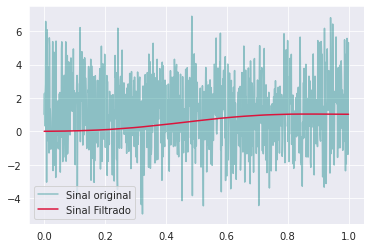

In [ ]:
fs = 1000.0                                          # taxa de amostragem
fc = 0.05/(0.5*fs)                                   # cutoff em 0.05 Hz
N = 1001                                             # tamanho do filtro
a = 1                                                # denominador do filtro (atenuação aceitável)
b = signal.firwin(N, cutoff=fc, window='hamming')    # filro passa baixa FIR

M = fs*60                                            # numero de amostras (60 segundos)
n = np.arange(N)                                     # bins
x1 = cos(2*pi*n*0.025/fs)                            # sinal a 0.025 Hz
noise = np.random.normal(0, 1, int(N))               # ruído
x = x1 + 2*noise                                     # sinal + ruído
y = signal.lfilter(b, a, x)                          # saída filtrada do sinal

plt.plot(n/fs, x, color = 'teal', alpha = 0.4, label = 'Sinal original')
plt.plot(n/fs, y, color = 'crimson', label = 'Sinal Filtrado')
plt.legend()
plt.show()

Agora vamos aplicar na música de Bach, entendendo um pouco melhor.

Dado um fator $factor$ de diminuição da resolução, o filtro passa-baixa precisa filtrar todas as frequências acima do fator $f_s/(2*factor)$. Adicionamos um pouco de espaço livre ao corte, ou seja, projetamos as frequências de corte no fator $f_s/(2*factor) - 0,01$ para acomodar a parte não ideal do filtro.

Importante observar uma característica do filtro projetado. O seu comprimento de 155 resulta em um atraso de grupo considerável, ou seja, ele introduz um atraso de aproximadamente $155/2$ amostras, o que pode não ser aceitável dependendo da aplicação real. Em áudio, não nos importamos muito com o atraso do grupo, então está tudo bem para nós aqui. Em particular, usamos um filtro FIR para alcançar a fase linear e, portanto, um atraso de grupo constante, o que é útil para não distorcer muito o som.

Essas são apenas informações iniciais, falta muito o que aprender sobre filtros. Estamos somente introduzindo o tema aqui, para você fazer a conexão, quando aprender mais profundamente o assunto.

In [ ]:
uploaded = files.upload()

def main(inputFilename, outputFilename, n):
    rate, data = read(inputFilename)
    write(outputFilename, rate/n, data[::n])

Saving Bach.wav to Bach.wav


In [ ]:
sample_rate, samples = wavfile.read('Bach.wav')
Audio(data=samples, rate=sample_rate)

In [ ]:
fs=sample_rate
print(type(samples))
L=len(samples)
dur=L*1.0/fs
print("Número de amostras: ",L)
print("Duração do áudi em segundos: ",dur)
print("Taxa de amostragem: ",fs)

<class 'numpy.ndarray'>
Número de amostras:  440999
Duração do áudi em segundos:  9.999977324263039
Taxa de amostragem:  44100


In [ ]:
def AliasingAudio(original, rate, factor):
    down_aliased = original[::factor] # downsampling, sem filtro anti aliasing
    a=1
    b = signal.firwin(155, 1.0/factor-0.01)
    lowpass = signal.lfilter(b, a, original)      # aplicando AAF FIR
    down_nonaliased = lowpass[::factor]           # downsampling

    display(HTML("Original:"), Audio(data=original, rate=rate))
    display(HTML("Com Aliasing:"), Audio(data=down_aliased, rate=rate/factor))
    display(HTML("Sem Aliasing:"), Audio(data=down_nonaliased,rate=rate/factor))


In [ ]:
AliasingAudio(samples, sample_rate, 6)

Vamos apenas ilustrar um filtro IIR.

In [ ]:
fs = 44100
t = np.arange(0., 0.5+1./fs, 1./fs)
totalTime = 1.5

mysound = totalTime * np.sin(2*np.pi*697*t) + totalTime * np.sin(2*np.pi*1477*t)
Audio(data=mysound, rate=sample_rate)

In [ ]:
#Criação do filtro
cutOff = 1000     # Cutoff
nyq = 0.5*fs
N  = 6            # ordem do filtro
fc = cutOff/nyq # Cutoff normalizado
b, a = signal.butter(N, fc)

In [ ]:
tempf = signal.filtfilt(b,a, mysound)
display(HTML("Original:"), Audio(data=mysound, rate=fs))
display(HTML("Filtrado:"), Audio(data=tempf,rate=fs))


### Exercício 07 - Responda

Depois de tanto estudar, agora chegou sua vez de pegar todo conhecimento adquirido e tentar responder às questões abaixo.

1. Um sinal analógico de faixa limitada é amostrado a $7500$ Hz (suficiente para assegurar que não haja aliasing), e $N$ amostras são coletadas. 
 - Qual é a resolução em freqüência da DFT em Hz, se $N = 1250$? 
 - Para atingir uma resolução em frequência de $4.5$ Hz, qual deve ser $N$?



2. Um sinal analógico de faixa limitada é amostrado ($N=980$, sem aliasing) a $500 $Hz. A DFT destas $980$ amostras é calculada. Queremos calcular o valor do espectro do sinal amostrado a $120$ Hz. 
 - Qual índice $k$ da DFT está mais próximo de 120 Hz, e qual é a sua frequência em Hertz? 
 - Qual é o número mínimo de zeros que devemos preencher além das $980$ amostras para obter um valor da DFT exatamente a $120$ Hz? Qual é o índice k da DFT correspondente a $120$ Hz?

<font size="1">Extraído da referência [1](https://www.princeton.edu/~cuff/ele301/files/lecture8_2.pdf)</font>


**Um pouco de teoria para ajudar você...**

<font size="1">Figura e discussão abaixo extraídas de [2].</font>

Relações entre as amostras de $x(t)$ e $X(\omega)$. 

![](https://drive.google.com/uc?export=view&id=1YXwqOgHUZ-PZ-uhDHnINuVqIGw5in8s9)


Cálculos numéricos da transformada de Fourier (a DFT) de $x(t)$ necessitam dos valores amostrados de $x(t)$, pois um computador digital pode trabalhar somente com dados discretos. Além disso, um computador pode calcular $X(\omega)$ apenas para valores discretos de  $\Omega$. Portanto, é umportante relacionar as amostras de $X(\Omega)$ com as amostras de $x(t)$. A Figura (a) mostra um sinal limitado no tempo $x(t)$ e, por consequencia, $X(\omega)$ não é limitado em faixa – Figura (b). De aordo com o teorema da amostragem, o espectro $\bar{X}(\omega)$ do sinal amostrado é $\bar{x}(t)$ constituído de $\bar{X}(\omega)$ repetindo a cada $f_s$ Hz, sendo $f_s=1/T$ como indicado nas Figuras (c,d). No passo seguinte, o sinal amostrado da Figura (c) é repetido periodicamente a cada $T_0$ segundos, como ilustrado na Figura (e). De acordo com o teorema de amostragem espectral, tal operação resulta na amostragem do espectro a uma taxa de $T_0 $amostras/Hz. Essa taxa de amostragem significa que as amostras são separadas por $f_0=1/T_0$  Hz – Figura (f).

A discussão mostra que quando um sinal $x(t)$ é amostrado e, então, periodicamente repetido, o espectro correspondente também é amostrado e periodicamente repetido. Quando amostramos $x(t)$ dentro de um espaço de tempo limitado, $T_0 < \infty$, então, matematicamente, estamos repetindo o sinal periodicamente, pois a transformada de Fourier (para sinal não periódico) é a Série de Fourier (sinal periódico), com período infinito...


### Exercício 08 - Ligue  o gráfico com o código

![](https://drive.google.com/uc?export=view&id=1Q3RSIlQSAFwiBWebRiSvGRhpOhUjx-Sa)

Ligue os gráficos acima com os respectivos códigos em Python abaixo. De preferência, use seu conhecimento antes de rodar cada programa e organize uma justificativa para sua escolha...

```
# Codigo n0. 01
h=[1, 1, 1, 1, 1, 1, 1, 1];
x = np.pad(h,(0,32-len(h)),mode='constant')
X = np.abs(np.fft.fft(x))

plt.bar(r_[0:32],abs(X), width = 0.7)
plt.xlim((0.01,32))
plt.show()
```


```
# Codigo n0. 02
h=[1, 1, 1, 1, 1, 1, 1, 1];
x = np.pad(h,(0,32-len(h)),mode='constant')
X = np.abs(np.fft.fft(x))

plt.bar(r_[0:32],abs(fftshift(X)), width = 0.7)
plt.xlim((0,32))
plt.show()
```


```
# Codigo n0. 03
h=[2, 2, 2, 2, 0, 0, 0, 0];
x = np.pad(h,(0,32-len(h)),mode='constant')
X = np.abs(np.fft.fft(x))

plt.bar(r_[0:32],abs(X), width = 0.7)
plt.xlim((0,32))
plt.show()
```


```
# Codigo n0. 04
h=[2, 2, 2, 2, 0, 0, 0, 0];
x = np.pad(h,(0,32-len(h)),mode='constant')
X = np.abs(np.fft.fft(x))

plt.bar(r_[0:32],abs(np.fft.fftshift(X)), width = 0.7)
plt.xlim((0,32))
plt.show()
```







### Exercício 09 - Ligue o gráfico com o código II

Se você Não conseguiu fazer o exercício anterior sem rodar o código, eis outra chance...

![](https://drive.google.com/uc?export=view&id=112vqMyS5hmMg4MLFWQhe6IWQRs2fPeo_)



```
# Codigo no. 01
N=40
h=hamming(N)/N
H=np.fft.fft(h)

plt.bar(r_[0:N],abs(H), width = 0.7)
plt.show()
```

```
# Codigo no. 02
N=40
h=[0.5, 0.5]
x = np.pad(h,(0,N-len(h)),mode='constant')
H=np.fft.fft(x)

plt.bar(r_[0:N],abs(H), width = 0.7)
plt.show()
```

```
# Codigo no. 03
N=40
h=[0.5, -0.5]
x = np.pad(h,(0,N-len(h)),mode='constant')
H=np.fft.fft(x)

plt.bar(r_[0:N],abs(H), width = 0.7)
plt.show()
```

```
# Codigo no. 04
N=40
h=[0.25, 0.5, 0.25]
x = np.pad(h,(0,N-len(h)),mode='constant')
H=np.fft.fft(x)

plt.bar(r_[0:N],abs(H), width = 0.7)
plt.show()
```

```
# Codigo no. 05
N=40
h=[-0.25, 0.5, -0.25]
x = np.pad(h,(0,N-len(h)),mode='constant')
H=np.fft.fft(x)

plt.bar(r_[0:N],abs(H), width = 0.7)
plt.show()
```

```
# Codigo no. 06
N=40
h=[0.25, 0.25, 0.25, 0.25]
x = np.pad(h,(0,N-len(h)),mode='constant')
H=np.fft.fft(x)

plt.bar(r_[0:N],abs(H), width = 0.7)
plt.show()
```





### Exercício 10 - Seu Desafio

 ![](https://drive.google.com/uc?export=view&id=15epdWitF9MdYc9eXwgTby3R6yFYn5CJC)

O filme Contatos Imediatos do terceiro grau (em inglês *Close Encounters of the Third Kind*, algumas vezes abreviado como CE3K ou simplesmente Close Encounters), de 1977, foi escrito e dirigido por Steven Spielberg. O título é tirado da classificação de contatos imediatos com alienígenas criada pelo ufologista J. Allen Hynek, em que o terceiro grau indica observações humanas de verdadeiros alienígenas ou seres animados. 

A comunicação entre os humanos e a raça alienígena era feita através de uma sequência de tons que os cientistas acreditavam ser reconhecida. Esta sequência era composta por 5 tons nas frequências 493.9Hz, 554.4Hz, 440Hz, 220Hz e 329.6Hz. 
Veja o vídeo do filme disponível no [link](
https://www.youtube.com/watch?v=m2JL0xABlrQ).

Sua tarefa consiste em criar um programa em Python que gere esta sequência de tons **no domínio da frequência**, considerando todos com a mesma duração. Mais precisamente você deve criar uma função `contatos(T)` onde `T` é a duração de cada tom da sequência. Por exemplo, ao digitar: 
```
 contatos(5)
```
deverá ser gerada a sequência de tons nos alto-falantes do PC com duração total de $25s$. Você pode usar quase todas as ferramentas do Python, exceto qualquer forma de loop. Além disso, o comando para geração do som pode ser utilizado uma única vez.

Tudo que você precisa de conhecimento, já adquiriu nos exercícios. Boa sorte.


 ![](https://drive.google.com/uc?export=view&id=1aB-2S6qY2Uxzop2m1rK-qgZwEX_E577q)




In [ ]:
def rect(t,Tp):
    x = (abs(t) < Tp)
    y = (abs(t) > 0)
    a = np.array(x*y)
    return 1 * a

def contatos(T1):
  T0 = 2*T1
  T = 5*T0
  Amplit=1
  fs=5000                                 # Frequência de amostragem [Hz]
  Ts = 1/fs                                   # Período de amostragem [s]
  N = int(T/Ts)                               # Número de pontos

  t_s = np.linspace(0,T,N,endpoint=False)     # Amostragem no tempo
  bins = np.arange(0,N)                       # bins


  f1= 493.9                                      
  f2= 554.4                                       # Frequência dos sinais senoidais
  f3 = 440
  f4 = 220
  f5 = 329.6


  seno1=Amplit*np.sin(2*np.pi*f1*t_s)          
  seno2=Amplit*np.sin(2*np.pi*f2*t_s)         # Geração das senoides no tempo 
  seno3=Amplit*np.sin(2*np.pi*f3*t_s)
  seno4=Amplit*np.sin(2*np.pi*f4*t_s)
  seno5=Amplit*np.sin(2*np.pi*f5*t_s)



  seno1 = np.fft.fftshift(np.fft.fft(seno1))
  seno2 = np.fft.fftshift(np.fft.fft(seno2))
  seno3 = np.fft.fftshift(np.fft.fft(seno3))   #Geração das senóides na freq
  seno4 = np.fft.fftshift(np.fft.fft(seno4))
  seno5= np.fft.fftshift(np.fft.fft(seno5))

  




  #janelamento na frequencia

  L=len(t_s)
  f = np.linspace(0,1,L,endpoint=False)*fs
  wRect1 = rect(t_s,T/5)
  F=np.fft.fft(wRect1)
  jan1=np.fft.fftshift(F)
  #janelas deslocadas no tempo -> alteracao de fase na frequencia
  theta=(-2j*np.pi*f*T/5)
  jan2 =jan1*np.exp(theta)
  jan3 =jan1*np.exp(2*theta)
  jan4 = jan1*np.exp(3*theta)
  jan5 = jan1*np.exp(4*theta)


  seno1 = np.fft.fftshift(np.fft.fft(seno1))
  seno2 = np.fft.fftshift(np.fft.fft(seno2))
  seno3 = np.fft.fftshift(np.fft.fft(seno3))
  seno4 = np.fft.fftshift(np.fft.fft(seno4))
  seno5= np.fft.fftshift(np.fft.fft(seno5))
  



  #testando as janelas
  #fig = plt.figure()
  #gs = gridspec.GridSpec(2,2)
  #
  #ax1=fig.add_subplot(gs[0,0])
  #ax2=fig.add_subplot(gs[0,1])
  #ax3=fig.add_subplot(gs[1,:])
  #
  #ax1.plot(t_s,wRect1, c= 'mediumaquamarine')
  #ax2.plot(t_s,wRect3, c = 'mediumseagreen')
  #ax3.plot(t_s,sinal, c = 'teal')
  #
  #plt.show()


  #convoluções
  Z1 = signal.convolve(seno1,jan1)
  Z1shifted = (np.fft.fftshift(Z1)[:N//2])/((T0*fs*N)/2)
  Z2 = signal.convolve(seno2,jan2)
  Z2shifted = (np.fft.fftshift(Z2)[:N//2])/((T0*fs*N)/2)
  Z3 = signal.convolve(seno3,jan3)
  Z3shifted = (np.fft.fftshift(Z3)[:N//2])/((T0*fs*N)/2)
  Z4 = signal.convolve(seno4,jan4)
  Z4shifted = (np.fft.fftshift(Z4)[:N//2])/((T0*fs*N)/2)
  Z5 = signal.convolve(seno5,jan5)
  Z5shifted = (np.fft.fftshift(Z5)[:N//2])/((T0*fs*N)/2)

  #testando convolucoes
  #f2 = np.linspace(0, 1/Ts, N)[:N//2]
  #fig, ax = plt.subplots()  
  #plt.ylabel(r'$|X(\omega)|$')
  #plt.xlabel(r'$f[Hz]$')
  #ax.bar(f2, np.abs(Z1shifted), width=1, color='darkslateblue', edgecolor='none')  
  #plt.show()

  #composicao
  Xfinal = Z1shifted+Z2shifted+Z3shifted+Z4shifted+Z5shifted

  #testando composicao
  #f2 = np.linspace(0, 1/Ts, N)[:N//2]
  #fig, ax = plt.subplots()  
  #plt.ylabel(r'$|X(\omega)|$')
  #plt.xlabel(r'$f[Hz]$')
  #ax.bar(f2, Xfinal, width=1, color='darkslateblue', edgecolor='none')  
  #plt.show()


  #retornando ao dominio do tempo
  ondafinal = np.fft.ifft(np.fft.ifftshift(Xfinal))
  #t_2 = np.linspace(0,T,N//2,endpoint=False)
  #plt.ylabel('Amplitude')
  #plt.xlabel('tempo [s]')
  #plt.plot(t_2, ondafinal)
  display(HTML("Som:"), Audio(data=ondafinal, rate=fs))

In [ ]:
contatos(5)